# K-近邻算法

> 采用测量不同特征值之间的距离方法进行分类。

## 特点

- 优点： 精度高， 对异常值不敏感，无数据输入假设。
- 缺点：计算复杂度高， 空间复杂度高
- 适用数据范围：数值型和标称型。

## 工作原理

存在一个样本数据，也称**训练样本集**,并且样本集中每个数据都存在标签，即我们知道样本集中每一个数据与所属分类的对应关系。输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征最相似（最近邻）的分类标签。

**一般只选择前k个最相似的数据**

## 一般流程：
1. 收集数据
2. 准备数据
3. 分析数据
4. 训练算法（k-近邻算法不适用）
5. 测试算法
6. 使用算法

In [1]:
import numpy as np
import operator

def createDateSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [2]:
group, labels = createDateSet()

In [3]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

## 算法实现：

In [10]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # 欧式距离计算
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distances = sqDistance**0.5
    #找出前k个距离最小的sample
    sortedDistIndicies = distances.argsort() # 这里返回的是indicies
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), 
                              key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

- numpy.ndarray.shape:
> Tuple of array dimensions
- numpy.tile(A, reps)
> Construct an array by repeating A the number of times given by reps
- numpy.sum(A, axis)
> Sum of array elem over a given axis
> for example :

```python
>>> np.sum([[0, 1], [0, 5], axis=0)
array([0, 6]) # 0 + 0 -> 0; 1 + 5 -> 6
>>> np.sum([[0, 1], [0, 5], axis=1)
array([1, 5]) # 0 + 1 -> 1; 0 + 5 -> 5
```

- numpy.argsort(a):
> return the `indices` that would sort an array

In [11]:
classify0([0,0], group, labels, 3)

'B'

# 使用k-近邻算法改进约会网站的配对结果

In [16]:
cat datingTestSet.txt

In [38]:
# 将文本记录到转换NumPy的解析程序
def file2matrix(filename):
    with open(filename) as f:
        arrayOfLines = f.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines, 3)) #3是因为有三个特征
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFormLine = line.split('\t')
        returnMat[index, :] = listFormLine[0:3]
        classLabelVector.append(int(listFormLine[-1])) #Label
        index += 1
    return returnMat, classLabelVector

In [39]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

In [40]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [41]:
datingLabels

[3,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,


## 绘制散点图

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure() 
ax = fig.add_subplot(111) #返回Axes对象（坐标轴，实际画图的地方）
# 参数用来指定figure中位置
# 1 -> 子图总行数为1
# 1 -> 子图总列数为1
# 1 -> 子图位置
# ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2]) #绘制散点图
# plt.show()

In [51]:
# 指定`s`,`c`参数（size, color)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2],
          15.0 * np.array(datingLabels), 15.0 * np.array(datingLabels))

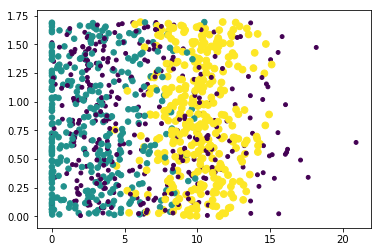

In [52]:
plt.show()

### 准备数据：归一化

In [60]:
def autoNorm(dataSet):
    minVals = dataSet.min(0) #参数是指定axis，所以返回的是一个array
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1)) #不是矩阵除法，而是逐项相除
    return normDataSet, ranges, minVals

In [61]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [62]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [63]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [64]:
minVals

array([0.      , 0.      , 0.001156])

### 测试算法

In [71]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],\
                                    datingLabels[numTestVecs:m], 3)
        print('the classifyer came back with %d, the real answer is %d' \
             % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / numTestVecs))

In [72]:
datingClassTest()

the classifyer came back with 3, the real answer is 3
the classifyer came back with 2, the real answer is 2
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back with 3, the real answer is 3
the classifyer came back with 3, the real answer is 3
the classifyer came back with 1, the real answer is 1
the classifyer came back with 3, the real answer is 3
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back with 2, the real answer is 2
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back with 1, the real answer is 1
the classifyer came back wit

### 使用算法

In [75]:
def classifyPerson():
    resultList = ['not at all', 'in samll doses', 'in lager doses']
    percentTats = float(input("percentage of time spent playing video games"))
    ffMiles = float(input("frequent flier miles earned per years?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix("datingTestSet2.txt")
    normMat, ranges, minVals, = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classiferResult = classify0((inArr-minVals)/ranges, 
                                normMat, datingLabels, 3)
    print("You will probably like this person: ", \
         resultList[classiferResult - 1])

In [76]:
classifyPerson()

percentage of time spent playing video games0.8
frequent flier miles earned per years?400
liters of ice cream consumed per year?0.5
You will probably like this person:  in samll doses


## 识别手写数字

In [79]:
# 图片转向量
def img2vector(fileName):
    returnVect = np.zeros((1, 1024))
    with open(fileName) as f:
        i = 0
        for line in f:
            for j in range(32):
                returnVect[0, 32*i + j] = int(line[j])
        return returnVect

In [80]:
# test img2vector
img2vector('testDigits/0_1.txt')

array([[0., 0., 0., ..., 0., 0., 0.]])

In [89]:
from os import listdir
def hardwritingClassTest():
    hwLabels = []
    traingFileList = listdir('trainingDigits')
    m = len(traingFileList)
    traingFileMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = traingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumber = int(fileStr.split('_')[0])
        hwLabels.append(classNumber)
        traingFileMat[i, :] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumber = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector("testDigits/%s" % fileNameStr)
        classiferResult = classify0(vectorUnderTest, \
                                   traingFileMat, hwLabels, 3)
        print("the classifer came back with: %d, the real answer is: %d" \
             % (classiferResult, classNumber))
        if (classiferResult != classNumber): errorCount += 1.0
    print("\nthe total number of error is %d" % errorCount)
    print("\nthe total error rate is %f", (errorCount/float(mTest)))

In [90]:
hardwritingClassTest()

the classifer came back with: 1, the real answer is: 1
the classifer came back with: 7, the real answer is: 2
the classifer came back with: 6, the real answer is: 4
the classifer came back with: 3, the real answer is: 3
the classifer came back with: 8, the real answer is: 1
the classifer came back with: 0, the real answer is: 0
the classifer came back with: 5, the real answer is: 8
the classifer came back with: 7, the real answer is: 3
the classifer came back with: 6, the real answer is: 1
the classifer came back with: 9, the real answer is: 7
the classifer came back with: 9, the real answer is: 5
the classifer came back with: 7, the real answer is: 7
the classifer came back with: 8, the real answer is: 8
the classifer came back with: 5, the real answer is: 5
the classifer came back with: 0, the real answer is: 4
the classifer came back with: 9, the real answer is: 7
the classifer came back with: 5, the real answer is: 5
the classifer came back with: 9, the real answer is: 1
the classi

the classifer came back with: 9, the real answer is: 7
the classifer came back with: 6, the real answer is: 6
the classifer came back with: 8, the real answer is: 6
the classifer came back with: 6, the real answer is: 6
the classifer came back with: 6, the real answer is: 8
the classifer came back with: 3, the real answer is: 5
the classifer came back with: 3, the real answer is: 8
the classifer came back with: 7, the real answer is: 3
the classifer came back with: 1, the real answer is: 9
the classifer came back with: 1, the real answer is: 1
the classifer came back with: 0, the real answer is: 4
the classifer came back with: 4, the real answer is: 6
the classifer came back with: 9, the real answer is: 5
the classifer came back with: 1, the real answer is: 5
the classifer came back with: 8, the real answer is: 1
the classifer came back with: 0, the real answer is: 9
the classifer came back with: 8, the real answer is: 1
the classifer came back with: 6, the real answer is: 0
the classi

the classifer came back with: 1, the real answer is: 4
the classifer came back with: 3, the real answer is: 2
the classifer came back with: 9, the real answer is: 4
the classifer came back with: 9, the real answer is: 3
the classifer came back with: 7, the real answer is: 9
the classifer came back with: 3, the real answer is: 3
the classifer came back with: 6, the real answer is: 1
the classifer came back with: 2, the real answer is: 2
the classifer came back with: 7, the real answer is: 5
the classifer came back with: 7, the real answer is: 7
the classifer came back with: 0, the real answer is: 5
the classifer came back with: 6, the real answer is: 4
the classifer came back with: 6, the real answer is: 4
the classifer came back with: 2, the real answer is: 2
the classifer came back with: 6, the real answer is: 3
the classifer came back with: 3, the real answer is: 3
the classifer came back with: 9, the real answer is: 9
the classifer came back with: 9, the real answer is: 8
the classi

the classifer came back with: 8, the real answer is: 9
the classifer came back with: 7, the real answer is: 8
the classifer came back with: 3, the real answer is: 3
the classifer came back with: 0, the real answer is: 1
the classifer came back with: 5, the real answer is: 3
the classifer came back with: 0, the real answer is: 5
the classifer came back with: 7, the real answer is: 7
the classifer came back with: 9, the real answer is: 9
the classifer came back with: 7, the real answer is: 5
the classifer came back with: 4, the real answer is: 4
the classifer came back with: 1, the real answer is: 4
the classifer came back with: 0, the real answer is: 4
the classifer came back with: 6, the real answer is: 4
the classifer came back with: 4, the real answer is: 8
the classifer came back with: 1, the real answer is: 1
the classifer came back with: 2, the real answer is: 3
the classifer came back with: 6, the real answer is: 3
the classifer came back with: 7, the real answer is: 0
the classi

the classifer came back with: 5, the real answer is: 0
the classifer came back with: 6, the real answer is: 6
the classifer came back with: 5, the real answer is: 6
the classifer came back with: 9, the real answer is: 4
the classifer came back with: 6, the real answer is: 3
the classifer came back with: 1, the real answer is: 2
the classifer came back with: 8, the real answer is: 5
the classifer came back with: 9, the real answer is: 2
the classifer came back with: 0, the real answer is: 8
the classifer came back with: 5, the real answer is: 2
the classifer came back with: 3, the real answer is: 1
the classifer came back with: 7, the real answer is: 7
the classifer came back with: 7, the real answer is: 3
the classifer came back with: 7, the real answer is: 3
the classifer came back with: 8, the real answer is: 0
the classifer came back with: 8, the real answer is: 4
the classifer came back with: 2, the real answer is: 2
the classifer came back with: 1, the real answer is: 8
the classi

the classifer came back with: 5, the real answer is: 0
the classifer came back with: 3, the real answer is: 1
the classifer came back with: 9, the real answer is: 5
the classifer came back with: 9, the real answer is: 6
the classifer came back with: 8, the real answer is: 2
the classifer came back with: 6, the real answer is: 6
the classifer came back with: 9, the real answer is: 7
the classifer came back with: 5, the real answer is: 9
the classifer came back with: 8, the real answer is: 9
the classifer came back with: 7, the real answer is: 7
the classifer came back with: 3, the real answer is: 0
the classifer came back with: 9, the real answer is: 2
the classifer came back with: 5, the real answer is: 3
the classifer came back with: 3, the real answer is: 5
the classifer came back with: 7, the real answer is: 7
the classifer came back with: 1, the real answer is: 6
the classifer came back with: 6, the real answer is: 6
the classifer came back with: 4, the real answer is: 8
the classi

the classifer came back with: 0, the real answer is: 7
the classifer came back with: 8, the real answer is: 9
the classifer came back with: 9, the real answer is: 0
the classifer came back with: 5, the real answer is: 4
the classifer came back with: 4, the real answer is: 1
the classifer came back with: 6, the real answer is: 6
the classifer came back with: 0, the real answer is: 8
the classifer came back with: 9, the real answer is: 0

the total number of error is 706

the total error rate is %f 0.7463002114164905
